<a href="https://colab.research.google.com/github/KorostinD/Diploma_project/blob/main/Generate_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import numpy as np


SAMPLE_RATE = 44100
S_16BIT = 2 ** 16

def generate_sample(freq, duration, volume):
    amplitude = np.round(S_16BIT * volume)
    # длительность генерируемого звука в сэмплах
    total_samples = np.round(SAMPLE_RATE * duration)
    # частоте дискретизации (пересчитанная)
    w = 2.0 * np.pi * freq / SAMPLE_RATE
    # массив сэмплов
    k = np.arange(0, total_samples)
    # массив значений функции (с округлением)
    return np.round(amplitude * np.sin(k * w))


In [91]:
import librosa as lb
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

sf.write('/sample_440.wav',generate_sample(440, 1, 0.7) , 44100, 'PCM_24')
audio_data='/sample_440.wav'
ipd.Audio(audio_data)


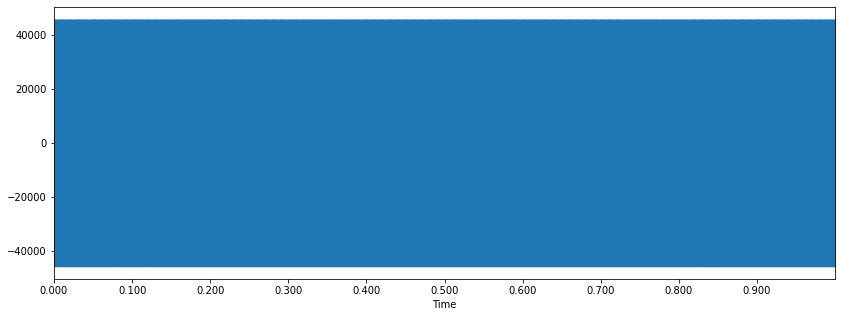

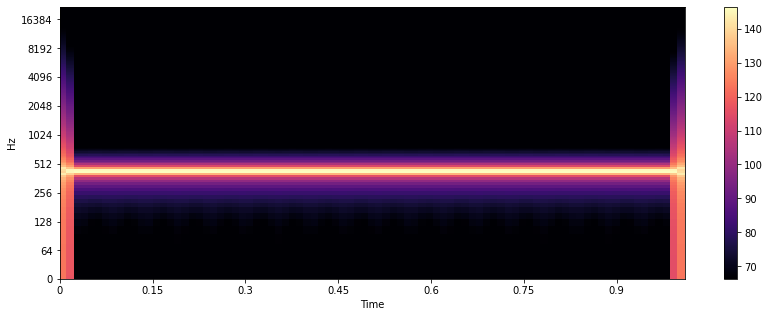

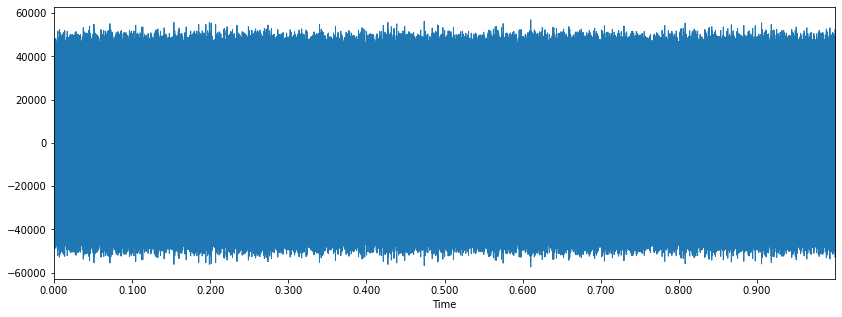

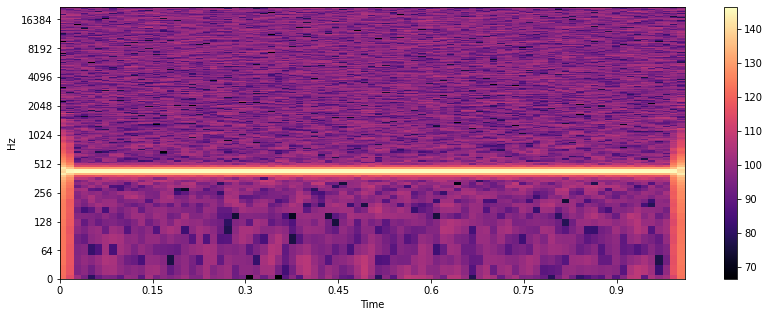

In [93]:

import numpy as np
import pylab as pl
 
def wgn(x, snr):
    snr = 10**(snr/10.0)
    xpower = np.sum(x**2)/len(x)
    npower = xpower / snr
    return np.random.randn(len(x)) * np.sqrt(npower)
 
def out_params(data):
  plt.figure(figsize=(14, 5))
  fourier= librosa.stft(data)
  fourierdb = librosa.amplitude_to_db(abs(fourier))
  librosa.display.waveplot(data, sr=SAMPLE_RATE)
  plt.figure(figsize=(14, 5))
  librosa.display.specshow(fourierdb, sr=SAMPLE_RATE, x_axis='time', y_axis='log')
  plt.colorbar()
  return 

t = np.arange(0, 1000000) * 0.1
sample = generate_sample(440, 1, 0.7)
noise = wgn(sample, 20)


noisy_sample = sample + noise

sf.write('/sample_440_noisy.wav',noisy_sample , SAMPLE_RATE, 'PCM_24')
audio_data_n='/sample_440_noisy.wav'

out_params(sample)
out_params(noisy_sample)






ipd.Audio(audio_data_n)